In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
# We only keep top 10,000 most frequently occurring words in the training data.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
print(train_data.shape[0])
print(test_data.shape[0])
# shape[1] is not fixed

25000
25000


In [4]:
# Different reviews are of different lenghts.
for seq in train_data[0:10]:
    print(len(seq))

218
189
141
550
147
43
123
562
233
130


In [5]:
print(train_labels[0])

1


In [6]:
print(max([max(sequence) for sequence in train_data]))

9999


In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for key, value in word_index.items()])

1646592/1641221 [==============================] - 0s 0us/step


In [8]:
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[1]])
# Indices 0, 1, and 2 are reserved for “padding,” “start of sequence,” and “unknown.”.
print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


In [9]:
# Encoding the integer sequence into a binary matrix using one-hot encoding.
import numpy as np
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Sequence is a list of integers.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

* 'relu' is the most popular activation function.
* For a binary classification, the output should be a probability. That translates into a single unit with sigmoid activation.
* For models that output probabilities, crossentropy is probably the best choice for loss function.

In [13]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [14]:
# Setting aside a validation set.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.5323 - accuracy: 0.7838 - val_loss: 0.4115 - val_accuracy: 0.8702
Epoch 2/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.3298 - accuracy: 0.8985 - val_loss: 0.3262 - val_accuracy: 0.8824
Epoch 3/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.2386 - accuracy: 0.9246 - val_loss: 0.2892 - val_accuracy: 0.8896
Epoch 4/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1857 - accuracy: 0.9418 - val_loss: 0.2791 - val_accuracy: 0.8907
Epoch 5/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1511 - accuracy: 0.9533 - val_loss: 0.2821 - val_accuracy: 0.8879
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1234 - accuracy: 0.9636 - val_loss: 0.3010 - val_accuracy: 0.8823
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [16]:
# Call to fit() returns the History object.
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


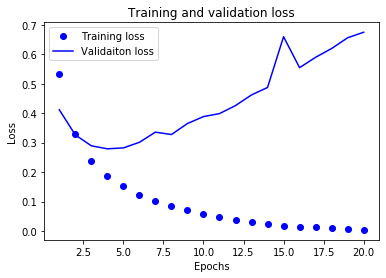

In [17]:
# Plotting the training and validation loss.
%matplotlib inline
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validaiton loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

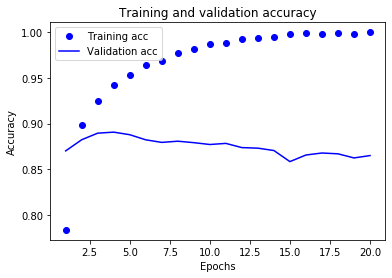

In [19]:
# Plotting the training and validation accuracy.
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### By analyzing the above plots, we can see that overfitting is happening:
* Training loss and accuracy behave as expected with increasing training epochs.
* However, the validation loss and accuracy don't behave as expected. They peak (min loss and max acc) around fourth epoch.
* These points indicate that there is an overfitting situation: after second epoch, we are overoptimizing on the training data and we end up learning representations that are specific to training data and don't generalize to data outside the training set.

In [20]:
# Retraining the model from scratch.
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
# Now we use insights from above to train on complete training set.
model.fit(x_train, y_train, epochs=4, batch_size=512)
# Check the model performance on the test set.
results=model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 117us/step - loss: 0.4677 - acc: 0.8144
Epoch 2/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.2622 - acc: 0.9101
Epoch 3/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.2001 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 3s 123us/step
[0.30226343146800994, 0.8820000290870667]


#### As we see above, a fairly nive approach could achieve about 88% accuracy.

In [21]:
# Using trained model to predict: generate likelihood of reviews being positive
partial_x_test = x_test[:100]
model.predict(partial_x_test)

array([[2.0051950e-01],
       [9.9996424e-01],
       [9.7730941e-01],
       [9.0578473e-01],
       [9.7343498e-01],
       [9.2676616e-01],
       [9.9988210e-01],
       [1.4712099e-02],
       [9.7972530e-01],
       [9.9519205e-01],
       [9.6467429e-01],
       [1.6279843e-02],
       [3.7428949e-04],
       [7.4178286e-02],
       [9.9858439e-01],
       [7.6934212e-04],
       [9.5227730e-01],
       [7.8813708e-01],
       [9.4993021e-03],
       [5.5996925e-02],
       [9.9879301e-01],
       [9.9607629e-01],
       [2.8552315e-01],
       [9.5678514e-01],
       [8.9507568e-01],
       [9.9201035e-01],
       [6.6148028e-02],
       [9.2549294e-01],
       [9.8731041e-01],
       [1.1371028e-03],
       [9.8948610e-01],
       [2.0695540e-01],
       [9.2397231e-01],
       [2.7881502e-05],
       [3.9041065e-02],
       [2.5312848e-02],
       [9.9949181e-01],
       [9.7472972e-01],
       [1.8805005e-01],
       [1.8693117e-02],
       [9.9521011e-01],
       [9.998858

##### Takeaway from above numbers:
Our model is confident about some examples, e.g., when the prediction output is 0.99 or 0.01. However, it is less confident when the output is 0.60 or 0.40 for example.